In [2]:
import pandas as pd
import numpy as np

dados = pd.read_csv('../dados/CSV_Completo.csv')

animal = 'É animal mais atropelado'
animalEscolhido = 'pomba-de-asa-branca'

dados.loc[dados.Animal == animalEscolhido,animal] = 1
dados.loc[dados.Animal != animalEscolhido,animal] = 0


dados[animal] = dados[animal].astype(int)
 

In [3]:
del(dados['Animal'])
del(dados['Km'])
del(dados['Hora da Coleta'])
del(dados['Local'])
del(dados['Tipo De Pistas'])

In [4]:
y = dados.pop(animal)
X = dados
# print(X)

In [5]:
# from sklearn.preprocessing import LabelEncoder
# from collections import defaultdict

# d = defaultdict(LabelEncoder)
# # Encoding the variable
# X_encoded = X.apply(lambda x: d[x.name].fit_transform(x))


In [6]:
# from sklearn.feature_selection import SelectKBest, chi2

# features = []

# for i in X_encoded:
#     features.append(i)

# k = 10 # seleciona 10 features

# sel_chi2 = SelectKBest(chi2, k = 10)
# X_train_novo = sel_chi2.fit_transform(X_encoded, y)

# print("os atributos escolhidos foram:")
# atributosSelect = []
# for j in sel_chi2.get_support(indices=True):
#     atributosSelect.append(features[j])
    
# print(atributosSelect)

# colums = ["target"]
# col2 = []
# for i in range(k):
#     colums.append(i)
#     col2.append(i)

# print(X_train_novo.shape)

# novoDf = pd.DataFrame(X_train_novo, y).reset_index()
# novoDf.columns = [colums]

# novoX = novoDf[col2]
# novoY = novoDf["target"]

In [7]:
# # Inverse the encoded
# X_decoded = X_encoded.apply(lambda x: d[x.name].inverse_transform(x))
# # print(X_decoded)
# dados_filtrados = pd.DataFrame()

# for i in atributosSelect:
#     dados_filtrados[i] = X_decoded[i]
    
# dados_filtrados[animal] = y

In [9]:
# dadosEncod = pd.get_dummies(dados_filtrados)
dadosEncod = pd.get_dummies(dados)
# dadosEncod['target'] = y

dummies_names = []

x_codificado = dadosEncod

for i in x_codificado:
    dummies_names.append(i)
    # print(i)
    
# dummies_names.remove(animal)

print(dadosEncod.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 95 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Mês                                             13096 non-null  int64
 1   Trecho                                          13096 non-null  int64
 2   Estação_Inverno                                 13096 non-null  uint8
 3   Estação_Outono                                  13096 non-null  uint8
 4   Estação_Primavera                               13096 non-null  uint8
 5   Estação_Verão                                   13096 non-null  uint8
 6   Sentido_JF                                      13096 non-null  uint8
 7   Sentido_RJ                                      13096 non-null  uint8
 8   Trecho macro_Baixada                            13096 non-null  uint8
 9   Trecho macro_Planalto                           13096 non-nul

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

features = dummies_names

# for i in x_codificado:
#     features.append(i)

k = 15 # seleciona 15 features

sel_chi2 = SelectKBest(chi2, k = 15)
X_train_novo = sel_chi2.fit_transform(x_codificado, y)

print("os atributos escolhidos foram:")
atributosSelect = []
for j in sel_chi2.get_support(indices=True):
    atributosSelect.append(features[j])
    
print(atributosSelect)

colums = ["target"]
col2 = []
for i in range(k):
    colums.append(i)
    col2.append(i)

print(X_train_novo.shape)

novoDf = pd.DataFrame(X_train_novo, y).reset_index()
novoDf.columns = [colums]

novoX = novoDf[col2]
novoY = novoDf["target"]

os atributos escolhidos foram:
['Trecho', 'Estação_Inverno', 'Estação_Verão', 'Trecho macro_Planalto', 'Trecho macro_Serra', 'Numero de Pistas_1', 'Tipo de Pavimento_Pavimento semi-flexível', 'Numero de Faixas_2', 'Numero de Faixas_4', 'Intervencao_sim', 'Floresta_não', 'Floresta_sim', 'Faixa de Quilometragem_Entre 0 e 25', 'Faixa de Quilometragem_Entre 25 e 50', 'Faixa de Quilometragem_Entre 75 e 100']
(13096, 15)


<BarContainer object of 2 artists>

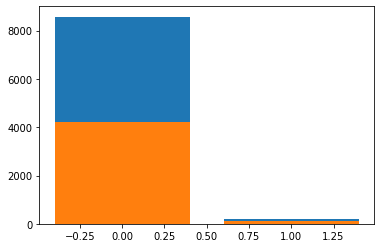

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

dadosTreino, dadosTeste = train_test_split(novoDf, test_size = 0.33, random_state = 0)

# countTreino = dadosTreino[animal].value_counts()
# countTeste = dadosTeste[animal].value_counts()

countTreino = dadosTreino["target"].value_counts()
countTeste = dadosTeste["target"].value_counts()
plt.bar([0, 1], countTreino) 
plt.bar([0, 1], countTeste) 



In [ ]:
treino_y = dadosTreino.pop("target")
treino_x = dadosTreino

teste_y = dadosTeste.pop("target")
teste_x = dadosTeste

Balanceamento:

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(treino_x, treino_y)

O classificador é inicializado com max depth = 3 e random state = 20. O argumento max depth controla a profundidade máxima da árvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X_res, y_res)
previsoes = modelo.predict(teste_x)


In [ ]:
from sklearn import tree
from sklearn.tree import export_text
import graphviz

# figura, eixos = plt.subplots(nrows=1,ncols=1,figsize=(300,300))
# tree.plot_tree(modelo, feature_names=dummies_names, filled = True)

targets = {0: "nao atropelado", 1: "atropelado"}

dot_data = tree.export_graphviz(modelo, out_file=None,
                        #  feature_names=dummies_names,
                         feature_names=atributosSelect,
                         class_names=targets,
                         filled=True, rounded=True,
                         special_characters=True, leaves_parallel=True)
graph = graphviz.Source(dot_data)
graph.render(animalEscolhido)

r = export_text(modelo, feature_names=atributosSelect)
print(r)

|--- Numero de Faixas_2 <= 0.50
|   |--- Estação_Verão <= 0.50
|   |   |--- class: 1
|   |--- Estação_Verão >  0.50
|   |   |--- class: 0
|--- Numero de Faixas_2 >  0.50
|   |--- Numero de Pistas_1 <= 0.50
|   |   |--- class: 0
|   |--- Numero de Pistas_1 >  0.50
|   |   |--- class: 0



              precision    recall  f1-score   support

           0       0.99      0.49      0.65      4221
           1       0.04      0.82      0.07       101

    accuracy                           0.50      4322
   macro avg       0.51      0.66      0.36      4322
weighted avg       0.97      0.50      0.64      4322

Matriz de confusão


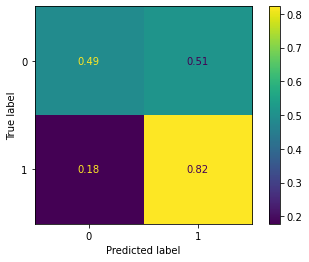

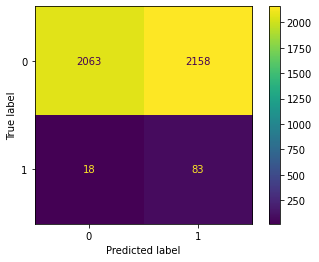

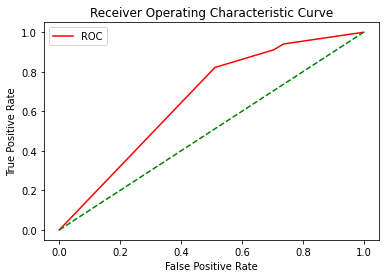

Área sob a curva ROC: 0.6628


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(teste_y, previsoes, zero_division=0))

print("Matriz de confusão")
matriz_confusaoPorc = confusion_matrix(teste_y, previsoes, normalize = 'true')
matrizPorc = ConfusionMatrixDisplay(matriz_confusaoPorc)
matrizPorc.plot()

matriz_confusao = confusion_matrix(teste_y, previsoes)
matriz = ConfusionMatrixDisplay(matriz_confusao)
matriz.plot()
plt.show()

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
from sklearn.metrics import roc_curve

TargetVarScore = modelo.predict_proba(teste_x)
fper, tper, thresholds = roc_curve(teste_y, TargetVarScore[:, 1])
plot_roc_curve(fper, tper)

# https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108#:~:text=Uma%20m%C3%A9trica%20para%20medir%20essa,podemos%20usar%20a%20fun%C3%A7%C3%A3o%20roc_auc_score%20.&text=Quanto%20mais%20pr%C3%B3ximo%20de%201.0,ROC%2C%20melhor%20%C3%A9%20o%20modelo.
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'
      .format(roc_auc_score(teste_y, TargetVarScore[:, 1])))

Obtendo regras de forma mais legível

In [ ]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
rules = get_rules(modelo, dummies_names, targets)

# > 0.5 = true
# <= 0.5 = false

for r in rules:
    str(r)
    new_r = r.replace('> 0.5', "= true").replace('<= 0.5', "= false")
    print(new_r)

if (Sentido_RJ = false) and (Estação_Inverno = false) then class: atropelado (proba: 63.4%) | based on 12,225 samples
if (Sentido_RJ = true) and (Estação_Verão = true) then class: nao atropelado (proba: 93.8%) | based on 2,355 samples
if (Sentido_RJ = false) and (Estação_Inverno = true) then class: nao atropelado (proba: 72.33%) | based on 2,147 samples
if (Sentido_RJ = true) and (Estação_Verão = false) then class: nao atropelado (proba: 80.14%) | based on 423 samples


Analizando a probabilidade de cada atributo na feature

In [ ]:
print(modelo.classes_)

feat_log_prob = modelo.predict_log_proba(X_res)
print(len(feat_log_prob))

[0 1]
17150
